## Censo de Población y Viviendas
Descargar CPV 2020 Aguascalientes
https://www.inegi.org.mx/programas/ccpv/2020/#datos_abiertos

In [1]:
pip install contextily

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   -------------------------- ------------- 81.9/125.4 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 301.2/301.2 kB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/23.4 MB ? eta -:--:--
    --------------------------------------- 0.5/23.4 MB 10.5 MB/s eta 0:00:03
   - -------------------------------------- 1.0/23.4 MB 10.9 MB/s eta 0:00:03
   --- ------------------------------------ 2.2/23.4 MB 15.7 MB/s eta 0:00:02
   ----- ---------------------------------- 3.0/23.4 MB 17.3 MB/s eta 0:00:02
   ----- ---------------------------------- 3.4/23.4 MB 14.5 MB/s eta 0:00:02
   ------ --------------------------------- 4.1/23.4 MB 15.4 MB/s eta 0:00:02
   -------- ------------------------------- 5.0/23.4 MB 15.1 MB/s eta 0:00:02
   

In [2]:
pip install geopandas


     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------------------------------ ------- 41.0/51.5 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 51.5/51.5 kB 378.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.1 MB 2.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.1 MB 3.5 MB/s eta 0:00:01
   ---------------------------- ----------- 0.8/1.1 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   - -------------------------------------- 0.8/22.9 MB 17.9 MB/s eta 0:00:02
   -- ------------------------------------- 1.3/22.9 MB 21.3 MB/s eta 0:00:02
   --- ---------------

In [3]:
import json
import requests
import os
import zipfile
import geopandas as gpd 
import pandas as pd
import io
import contextily as cx

In [11]:
url= "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/datosabiertos/ageb_manzana/ageb_mza_urbana_01_cpv2020_csv.zip"
# Puedo cambiar con un for el 01 (Aguascalientes).

In [12]:
response = requests.get(url)
if response.status_code == 200:
    # Crear un archivo ZIP en memoria
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Extraer los archivos del ZIP
        z.extractall('CPV_2020')
else:
    print('Error al descargar el archivo ZIP')

In [17]:
df = pd.read_csv('CPV_2020/ageb_mza_urbana_01_cpv2020/conjunto_de_datos/conjunto_de_datos_ageb_urbana_01_cpv2020.csv')
# Igual aquí, cada que diga 01, cambio de número si quiero cambiar de estado.
df.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la entidad,0000,0,1425607,728924,...,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711
1,1,Aguascalientes,1,Aguascalientes,0,Total del municipio,0000,0,948990,486917,...,116647,251719,178619,130290,80951,56131,3299,7293,74227,731
2,1,Aguascalientes,1,Aguascalientes,1,Total de la localidad urbana,0000,0,863893,444725,...,112002,232793,169675,123670,77719,53589,2995,5984,63661,595
3,1,Aguascalientes,1,Aguascalientes,1,Total AGEB urbana,0017,0,2237,1137,...,11,625,189,352,46,74,15,23,391,*
4,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,1,170,87,...,*,53,13,33,5,5,0,*,36,0


In [19]:
df.shape

(16376, 230)

In [ ]:
urlMza = "https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463807469/889463807469_s.zip"
response = requests.get(urlMza)
if response.status_code == 200:
    # Crear un archivo ZIP en memoria
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Extraer los archivos del ZIP
        z.extractall('Manzanas_2020')
else:
    print('Error al descargar el archivo')

In [6]:
gdf= gpd.read_file("Manzanas_2020/01_aguascalientes.zip!/conjunto_de_datos/01m.shp").to_crs(4326)
gdf.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,AMBITO,TIPOMZA,geometry
0,0100600010051001,01,006,0001,0051,001,Urbana,Típica,"POLYGON ((-102.28374 22.14619, -102.28379 22.1..."
1,0100600010051002,01,006,0001,0051,002,Urbana,Típica,"POLYGON ((-102.28481 22.14618, -102.28433 22.1..."
2,0100600010051003,01,006,0001,0051,003,Urbana,Típica,"POLYGON ((-102.28431 22.14633, -102.28437 22.1..."
3,0100600010051004,01,006,0001,0051,004,Urbana,Típica,"POLYGON ((-102.28399 22.14781, -102.28394 22.1..."
4,0100600010051005,01,006,0001,0051,005,Urbana,Típica,"POLYGON ((-102.28313 22.14847, -102.28312 22.1..."


In [7]:
df['CVEGEO'] = df['ENTIDAD'].map(str).str.zfill(2) + df['MUN'].map(str).str.zfill(3) + df['LOC'].map(str).str.zfill(4) + df['AGEB'].map(str).str.zfill(4) + df['MZA'].map(str).str.zfill(3)

In [8]:
gdf_merged = gpd.GeoDataFrame(pd.merge(gdf, df, on='CVEGEO'))

In [9]:
gdf_filtrado = gdf_merged.query("NOM_LOC == 'Aguascalientes'")

In [15]:
gdf_filtrado = gdf_filtrado[gdf_filtrado['PCDISC_MOT'] != '*']
gdf_filtrado['PCDISC_MOT'] = gdf_filtrado['PCDISC_MOT'].astype(int)

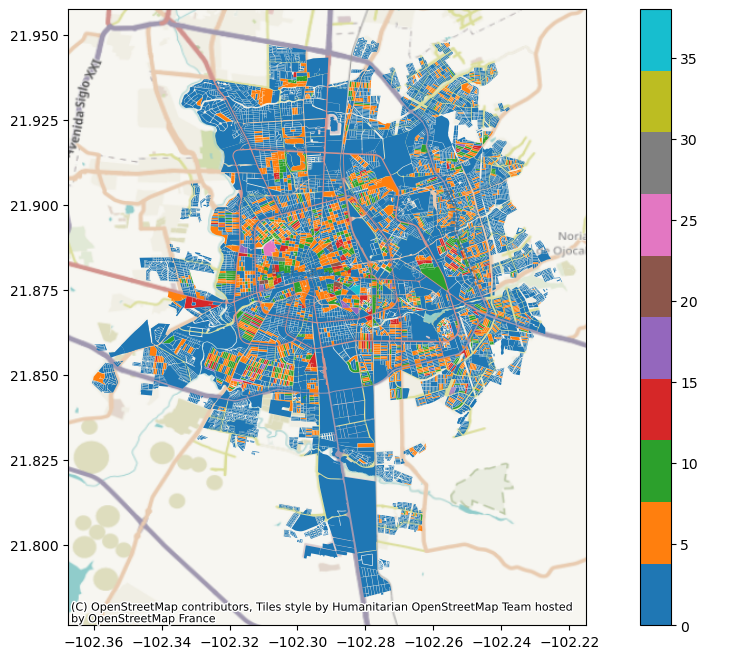

In [25]:
ax = gdf_filtrado.plot("PCDISC_MOT", cmap="tab10", legend=True, figsize=(14, 8))
cx.add_basemap(ax, crs=gdf_filtrado.crs.to_string())